# STEP-1 : LOAD LIBRARIES & DATASET

#importing necessary libraries
#importing pandas lib and is used for data manipulations and analysis

#import numpy a numeric computing lib (i.e mat operations,arrays,handling  missing values)

#matplot for plotting (lineplots,bar charts,histograms,scatterplots)

#seaborn for statistical visualization 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") #set (visual style)

df=pd.read_csv(r"C:\Users\shiva\Downloads\bank_customer_churn.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,452,Spain,Female,68,7,234120.81,3,1,0,158647.15,1
1,785,Spain,Female,35,3,239938.03,2,1,1,97780.00,1
2,698,Spain,Male,30,4,242242.03,3,0,0,191244.63,1
3,620,Spain,Female,62,2,156410.41,1,1,0,197230.39,1
4,456,France,Female,41,4,96177.91,1,0,1,103689.12,1


# STEP-2 UNDERSTAND DATASET STRUCTURE

In [5]:
# We observe Rows and Columns
df.shape

(5000, 11)

In [6]:
#we observe data types ,missing values, which columns are categrical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      5000 non-null   int64  
 1   Geography        5000 non-null   object 
 2   Gender           5000 non-null   object 
 3   Age              5000 non-null   int64  
 4   Tenure           5000 non-null   int64  
 5   Balance          5000 non-null   float64
 6   NumOfProducts    5000 non-null   int64  
 7   HasCrCard        5000 non-null   int64  
 8   IsActiveMember   5000 non-null   int64  
 9   EstimatedSalary  5000 non-null   float64
 10  Exited           5000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 429.8+ KB


In [8]:
# observes min/max values 
#mean, standard deviation
#check abnormal values

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,601.162800,46.580000,4.934800,123769.243444,2.490200,0.487400,0.492800,105729.236768,0.80220
std,144.904972,16.685997,3.160213,71643.523454,1.135148,0.499891,0.499998,54661.531607,0.39838
min,350.000000,18.000000,0.000000,2.320000,1.000000,0.000000,0.000000,10027.700000,0.00000
25%,477.000000,32.000000,2.000000,61663.237500,1.000000,0.000000,0.000000,59314.230000,1.00000
50%,602.500000,46.000000,5.000000,122732.100000,2.000000,0.000000,0.000000,106389.335000,1.00000
75%,728.000000,61.000000,8.000000,184344.495000,4.000000,1.000000,1.000000,153114.142500,1.00000
max,850.000000,75.000000,10.000000,249923.710000,4.000000,1.000000,1.000000,199995.030000,1.00000


# STEP-3 CHECK MISSING VALUES

Interpretation

If all zeros → dataset is clean

If not → need data cleaning

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# STEP-4 TARGET VARIABLE ANALYSIS

count of churn and not churn

In [11]:
df["Exited"].value_counts()

Exited
1    4011
0     989
Name: count, dtype: int64

In [ ]:
#churn usually less than<30 %

In [16]:
# percentage
df["Exited"].value_counts(normalize=True)*100

Exited
1    80.22
0    19.78
Name: proportion, dtype: float64

In [18]:
#visualize target

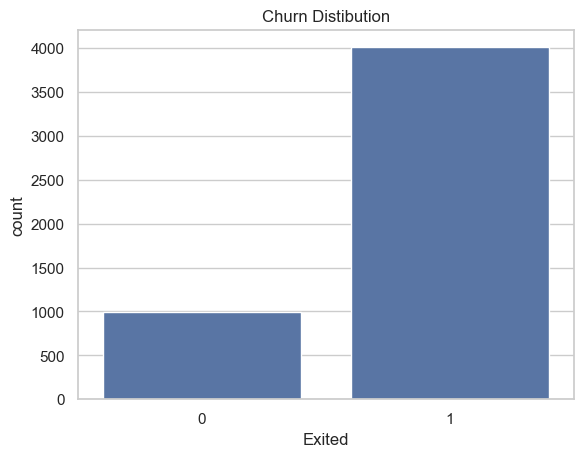

In [19]:
sns.countplot(x="Exited",data=df)
plt.title("Churn Distibution")
plt.show()

STEP 5 Categorical Features Vs Churn

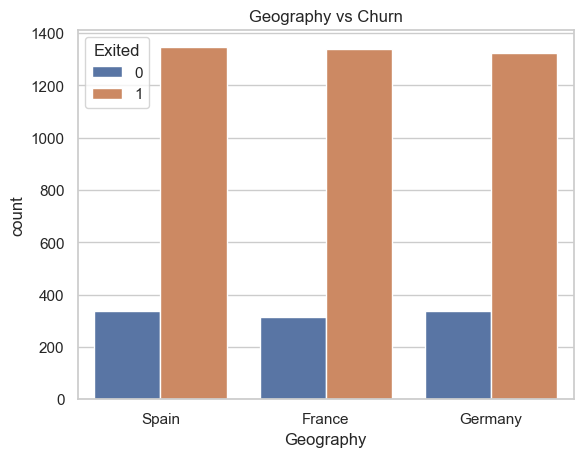

In [21]:
# geography vs churn
sns.countplot(x="Geography",hue="Exited",data=df)
plt.title("Geography vs Churn")
plt.show()

from this we observe which country has higher churn

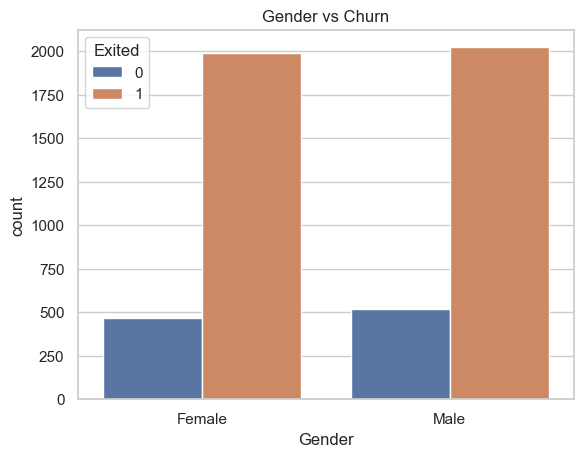

In [22]:
#Gender vs Churn
sns.countplot(x="Gender",hue="Exited",data=df)
plt.title("Gender vs Churn")
plt.show()

# STEP-6 NUMERICAL FEATURES VS CHURN

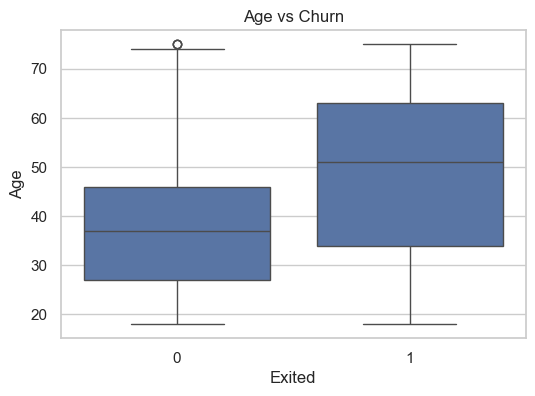

In [25]:
# age vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Exited",y="Age",data=df)
plt.title("Age vs Churn")
plt.show()

Churners usually older

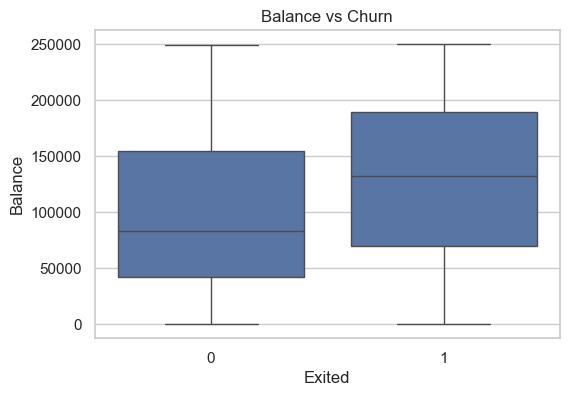

In [26]:
# Balance vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

High Balance customers churning

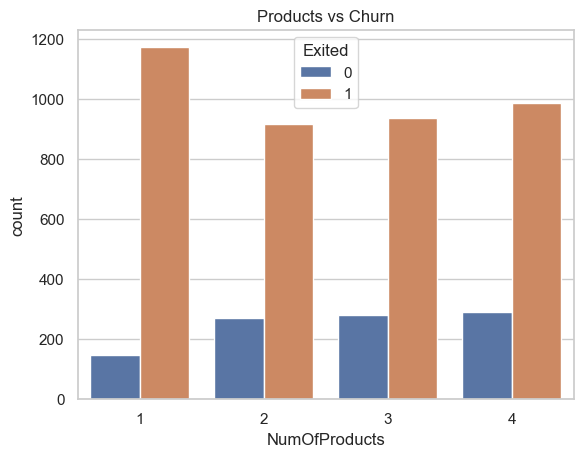

In [27]:
#NumOfProducts vs Churn
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Products vs Churn")
plt.show()

Interpret

Low product count → higher churn

# STEP-7 CORELATION ANALYSIS

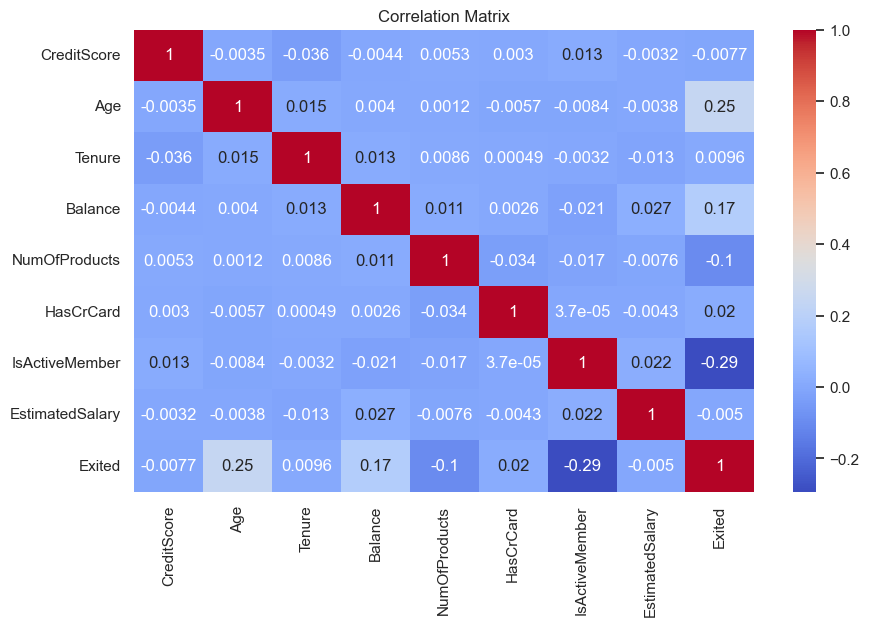

In [32]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()


# STEP-8 EDA CONCLUSION

### EDA Summary
- Dataset contains 5000 customers with no missing values
- Target variable (Exited) is imbalanced
- Age and IsActiveMember strongly influence churn
- Geography affects churn behavior
- Customers with fewer products are more likely to churn